# Car values from numberplate 

**Choose system** | windows = true, mac = false | 

**Choose car** | You can pick between "Aygo" or "Tesla" for now |



In [1]:
on_windows = True 
car_model = "Tesla"
from matplotlib import pyplot as plt

#### Picture of the cars to choose from

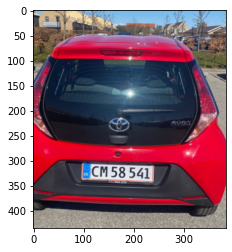

In [2]:
import matplotlib.image as mpimg
img = mpimg.imread('./images/aygo.png')
imgplot = plt.imshow(img)
plt.show()

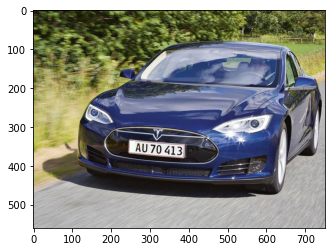

In [3]:
img2 = mpimg.imread('./images/tesla.jpg')
imgplot = plt.imshow(img2)
plt.show()

### Find numberplate

Nummerpladen er: AU 70 413



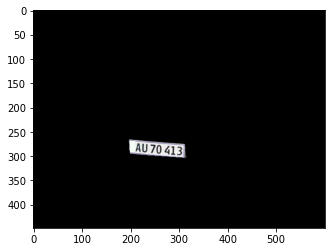

In [4]:
from modules import photohandling as ph

numberplate = ph.find_numberplate(on_windows, car_model)

### Scrape web data from nummerplade.net

In [5]:
import modules.nummerplade_scraper as np_scraper
search_car = np_scraper.numberplate_scraper(numberplate, on_windows)

search_car_km = search_car.get_car_km()
search_car_make_model = search_car.get_car_make_model()
search_car_year = search_car.get_car_model_year()


print("Search_car_km: " + search_car_km)
print("Search_car_year: " + search_car_year)
print("Mærke/model på søgte bil: ", search_car_make_model)

search_car.close_browser()

Starting up..
Got Browser
Search Entered
Search done
Search_car_km: 92000
Search_car_year: 2015 
Mærke/model på søgte bil:  Tesla Model S 


### Scrape web data from Bilbasen.dk

In [6]:
import modules.bilbasen_scraper as bilbasen_scraper

bilbasen = bilbasen_scraper.my_car(on_windows)
bilbasen.click_cookie_button()
bilbasen.click_leasing_button()
bilbasen.search_in_search_bar(search_car_make_model)
print("Searching for: " + search_car_make_model)
bilbasen.get_car_list()
bilbasen.close_browser()
make_me_dataframe = bilbasen.car_list


Starting up...
Got Browser
Cookie Button Clicked
Leasing Button Clicked
Search Bar Entered
Searching for: Tesla Model S 
Souping Site

Cars found: 32
{'name': 'Tesla Model S  90D 5d', 'km': 40000, 'price': '400000', 'year': 2016}
{'name': 'Tesla Model S  85 5d', 'km': 141000, 'price': '299700', 'year': 2014}
{'name': 'Tesla Model X  100D 6prs 5d', 'km': 28000, 'price': '839000', 'year': 2018}
{'name': 'Tesla Model S  85D 5d', 'km': 79000, 'price': '399900', 'year': 2015}
{'name': 'Tesla Model S  85 5d', 'km': 150000, 'price': '289800', 'year': 2014}
{'name': 'Tesla Model S  Long Range AWD 5d', 'km': 31000, 'price': '699900', 'year': 2020}
{'name': 'Tesla Model S  75D 5d', 'km': 75000, 'price': '470000', 'year': 2017}
{'name': 'Tesla Model S  P85D 5d', 'km': 87000, 'price': '414500', 'year': 2015}
{'name': 'Tesla Model S  Ludicrous Performance AWD 5d', 'km': 34000, 'price': '799900', 'year': 2019}
{'name': 'Tesla Model S  85 5d', 'km': 103000, 'price': '299900', 'year': 2014}
{'name': '

### Machine learning 

In [7]:

import modules.regression as regression
import pandas as pd

data = pd.DataFrame(make_me_dataframe) 
data.head()



,name,km,price,year
0,Tesla Model S 90D 5d,40000,400000,2016
1,Tesla Model S 85 5d,141000,299700,2014
2,Tesla Model X 100D 6prs 5d,28000,839000,2018
3,Tesla Model S 85D 5d,79000,399900,2015
4,Tesla Model S 85 5d,150000,289800,2014


##### Create instance of the regression class

In [8]:
find_car = regression.find_car_value(
    data, search_car_km, search_car_year)

#### Validate that we get data from dataframe

In [9]:
find_car.show_dataframe()

,name,km,price,year
0,Tesla Model S 90D 5d,40000,400000,2016
1,Tesla Model S 85 5d,141000,299700,2014
2,Tesla Model X 100D 6prs 5d,28000,839000,2018
3,Tesla Model S 85D 5d,79000,399900,2015
4,Tesla Model S 85 5d,150000,289800,2014


#### Normalizing the data 

In [10]:
scaled_df = find_car.normalize_data()

#### Data visualization with normalized data

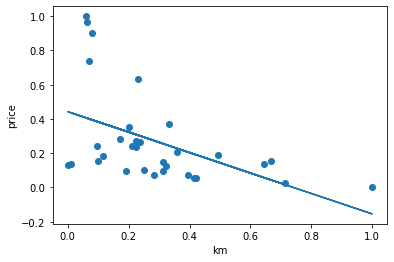

In [11]:
from matplotlib import pyplot as plt
import numpy as np

x1 = scaled_df['km']
y = scaled_df['price']

plt.scatter(x1, y)
plt.xlabel("km")
plt.ylabel("price")

# m = slope, b = intercept 
m, b = np.polyfit(x1, y, 1)
plt.plot(x1, m*x1+ b)

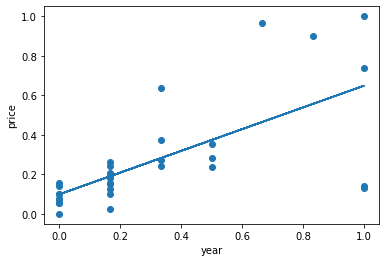

In [12]:
x2 = scaled_df['year']
y = scaled_df['price']

plt.scatter(x2, y)
plt.xlabel("year")
plt.ylabel("price")

m, b = np.polyfit(x2, y, 1)
plt.plot(x2, m*x2+b)

#### Describing the data to get an idea of the values 

In [13]:
find_car.describe_data()


,km,year
count,32.00000,32.00000
mean,104593.75000,2015.87500
std,76140.72683,2.01206
min,7000.00000,2014.00000
25%,44750.00000,2014.00000
50%,86000.00000,2015.00000
75%,132000.00000,2017.00000
max,346000.00000,2020.00000


#### Trains the model using the data fetched 

In [14]:
find_car.train_model()


(        km  year
 11   46000  2015
 22   83000  2016
 10  113000  2014
 2    28000  2018
 16  120000  2016
 14   27000  2020
 28  174000  2015,
 11    365000
 22    419000
 10    314900
 2     839000
 16    479700
 14    859000
 28    369900
 Name: price, dtype: object)

#### Finding slope and interception | Used for data visualization

In [15]:
coeff_df, intercept = find_car.show_coff_and_interception()


Using the coeff and the interception given by the linear regression model to do the graph.
Then we combine the two coefficents and plot the data.

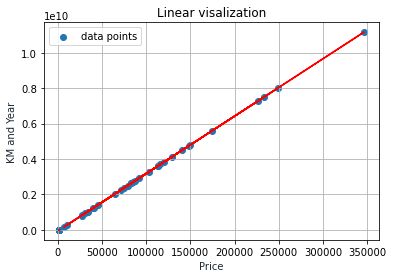

In [16]:
x = find_car.X

km_coeff = int(coeff_df.iloc[0])
year_coeff = int(coeff_df.iloc[1])

slope = (km_coeff) + (year_coeff)
y = slope*x+intercept

plt.plot(x, y, "red")
plt.scatter(x,y, label="data points")
plt.title('Linear visalization')
plt.xlabel('Price', color='#1C2833')
plt.ylabel('KM and Year', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

#### Compare actual scraped values to the ones predicted by the model
The following piece of code compares how accurate the code is based on the metrics.score() function

In [17]:
find_car.prediction_vs_real()


,Actual,Predicted
11,365000,383057.494579
22,419000,405248.390766
10,314900,332089.304072
2,839000,485325.096286
16,479700,395010.314902
14,859000,550459.745140
28,369900,347639.286186


#### Accuracy of the algorithm

In [18]:
find_car.predict_data_accuracy()

Model accuracy: 40.38445191016813 %


#### Shows the predicted value of the entered car

In [19]:
find_car.predict_car_value()

Value of the entered car: 370329.07593759 kr
